In [11]:
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from functions import Util

path_data = './data'
file_name_r = path_data + '/covid19-regioni.csv'
map_mapping = {'R': path_data + '/Italy_NUTS_2.json', 'P': path_data + '/Italy_NUTS_3.json'}

In [12]:
# Read geojson NUTS 2 file
with open(map_mapping[Util.REGION], encoding='utf-8') as map_geojson_r:
    map_json_r = json.load(map_geojson_r)
properties = map_json_r['features'][0]['properties']
properties

{'reg_name': 'Piemonte', 'reg_istat_code_num': 1, 'reg_istat_code': '01'}

In [13]:
df_r = pd.read_csv(file_name_r)
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_r.columns
# totale_ospedalizzati = ricoverati_con_sintomi + terapia_intensiva
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# variazione_totale_positivi = totale_positivi(S) - totale_positivi(S - 1)
# totale_casi = totale_positivi + dimessi_guariti + deceduti

Index(['data', 'codice_regione', 'denominazione_regione',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati',
       'variazione_ricoverati_con_sintomi', 'variazione_terapia_intensiva',
       'variazione_totale_ospedalizzati', 'variazione_isolamento_domiciliare',
       'variazione_nuovi_positivi', 'nuovi_tamponi', 'nuovi_casi_testati',
       'nuovi_deceduti', 'nuovi_dimessi_guariti', 'np_su_nt'],
      dtype='object')

In [14]:
# Print stats
print('Nuovi positivi:', df_r['nuovi_positivi'].sum())
print('Nuovi tamponi:', df_r['nuovi_tamponi'].sum())
print('Percentuale nuovi positivi/nuovi tamponi:', (df_r['nuovi_positivi'].sum()/df_r['nuovi_tamponi'].sum()).round(4), '%')
print('Nuovi guariti:', df_r['nuovi_dimessi_guariti'].sum())
print('Nuovi deceduti:', df_r['nuovi_deceduti'].sum())
print('Variazione positivi ricoverati con sintomi:', df_r['variazione_ricoverati_con_sintomi'].sum())
print('Variazione positivi in terapia intensiva:', df_r['variazione_terapia_intensiva'].sum())
print('Variazione positivi in isolamento dimiciliare:', df_r['variazione_isolamento_domiciliare'].sum())

Nuovi positivi: 2677
Nuovi tamponi: 99742
Percentuale nuovi positivi/nuovi tamponi: 0.0268 %
Nuovi guariti: 1418
Nuovi deceduti: 28
Variazione positivi ricoverati con sintomi: 138
Variazione positivi in terapia intensiva: -4
Variazione positivi in isolamento dimiciliare: 1097


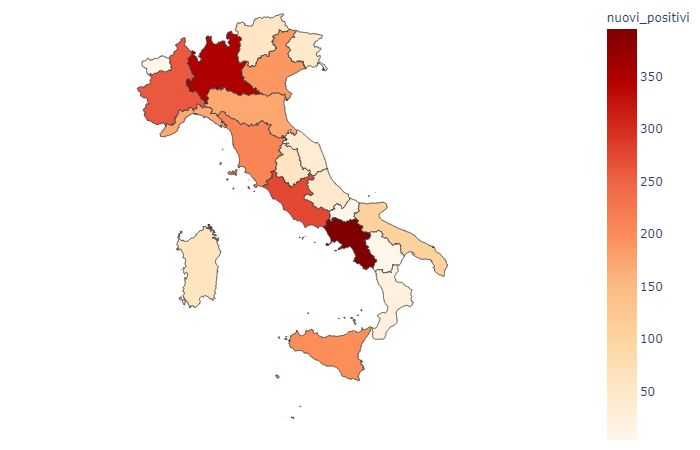

In [18]:
interactive = False
# Map of new positives by region
Util.choropleth_map(df=df_r,
                    geojson=map_json_r,
                    color='nuovi_positivi',
                    locations='denominazione_regione',
                    featureidkey='properties.reg_name',
                    interactive=interactive)

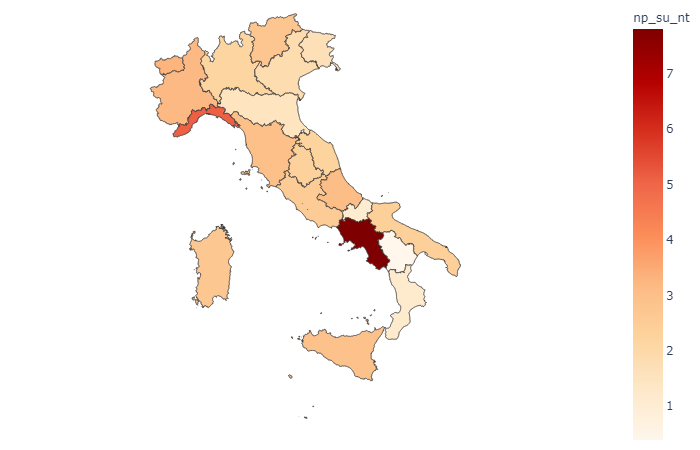

In [19]:
# Map of new positives on new swabs per region
Util.choropleth_map(df=df_r,
                    geojson=map_json_r,
                    color='np_su_nt',
                    locations='denominazione_regione',
                    featureidkey='properties.reg_name',
                    interactive=interactive)

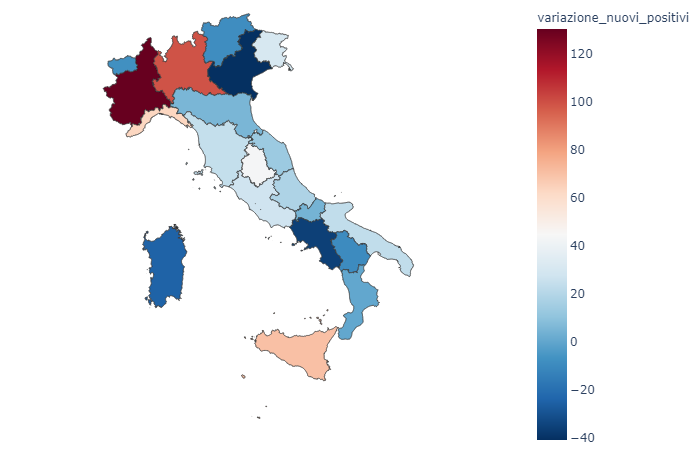

In [20]:
# Map of variation of new positives with respect to the day before
Util.choropleth_map(df=df_r,
                    geojson=map_json_r,
                    color='variazione_nuovi_positivi',
                    color_continuous_scale=px.colors.sequential.RdBu,
                    reversescale=True,
                    locations='denominazione_regione',
                    featureidkey='properties.reg_name',
                    interactive=interactive)